<a href="https://colab.research.google.com/github/Leon-afk1/Music_type_classification/blob/main/DS52_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and data loading

In [ ]:
import pandas as pd
import os
import kagglehub
%matplotlib inline
from tensorflow import keras
!pip install wandb

import wandb

In [ ]:
# wandb.login()
wandb.login(key="")

In [ ]:
wandb.init(entity='',
           name='',
           project='')
# #réinit les runs selon les differents modèles et dataviz

In [ ]:
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
#Dataset path
print("Path to dataset files:", path)

#3 seconds csv files path
sec3_path = os.path.join(path, 'Data/features_3_sec.csv')
print(sec3_path)

100%|██████████| 1.21G/1.21G [00:26<00:00, 49.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1
/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/features_3_sec.csv


In [ ]:
df_3seconds = pd.read_csv(sec3_path)

In [ ]:
sec30_path = os.path.join(path, 'Data/features_30_sec.csv')
print(sec30_path)
df_30seconds = pd.read_csv(sec30_path)

/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/features_30_sec.csv


# Data exploration

## basic stuff

In [ ]:
df_3seconds.shape

(9990, 60)

In [ ]:
df_3seconds.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
#no null/empty vallues
df_3seconds.isnull().sum()

,0
filename,0
length,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0


In [ ]:
df_3seconds.groupby('label').describe()

length                                                             \
            count     mean  std      min      25%      50%      75%      max   
label                                                                          
blues      1000.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
classical   998.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
country     997.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
disco       999.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
hiphop      998.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
jazz       1000.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
metal      1000.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
pop        1000.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
reggae     1000.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   
rock        998.0  66149.0  0.0  66149.0  66149.0  66149.0  66149.0  66149.0   

          chroma_stft_mean            ... mfcc20_mean            mfcc20_var  \
                     count      mean  ...         75%        max      count   
label                                 ...                                     
blues               1000.0  0.342438  ...    1.583115  16.433592     1000.0   
classical            998.0  0.264508  ...    2.734061  23.925459      998.0   
country              997.0  0.344996  ...   -0.112072  18.994617      997.0   
disco                999.0  0.416377  ...    3.335919  16.739954      999.0   
hiphop               998.0  0.454590  ...    1.331117  27.121729      998.0   
jazz                1000.0  0.297520  ...    1.722670  34.212101     1000.0   
metal               1000.0  0.480162  ...    4.292558  14.396937     1000.0   
pop                 1000.0  0.398089  ...    3.055651  22.153114     1000.0   
reggae              1000.0  0.408984  ...    1.091618  13.058143     1000.0   
rock                 998.0  0.387546  ...    1.011013  12.254066      998.0   

                                                                             \
                mean        std        min        25%        50%        75%   
label                                                                         
blues      61.892176  43.773409   9.373929  33.751757  49.254820  74.225649   
classical  77.626622  72.223445   7.539318  34.690552  56.393847  94.456089   
country    49.494789  33.344235  12.694579  30.627039  41.019085  58.092171   
disco      51.748709  28.862041  12.803848  30.599558  44.479912  63.786512   
hiphop     55.615884  35.414361   1.429122  32.607291  46.412907  64.536987   
jazz       76.779319  68.609761   8.740021  32.525084  58.343088  97.263458   
metal      30.856026  15.089477   8.696860  20.535612  27.233660  36.905983   
pop        72.300219  49.259255  13.102911  39.207925  57.375675  90.022551   
reggae     55.024500  31.414580   0.282131  34.227880  47.980501  66.084873   
rock       41.865119  28.827706   8.696860  24.479403  33.675528  48.724070   

                       
                  max  
label                  
blues      342.770660  
classical  737.327026  
country    420.138336  
disco      273.096924  
hiphop     270.835205  
jazz       910.473206  
metal      140.289459  
pop        395.797638  
reggae     288.070251  
rock       308.389771  

[10 rows x 464 columns]

## Comparaison signal Rock et Classique

In [ ]:
import librosa
import librosa.display
import librosa.display as lplt
# Lecture du fichier audio depuis le bon chemin
audio_rock = os.path.join(path, "Data/genres_original/rock/rock.00025.wav")
audio_classical = os.path.join(path, "Data/genres_original/classical/classical.00025.wav")
# Chargement du fichier audio
data_rock, sr_rock = librosa.load(audio_rock)
print(type(data_rock), type(sr_rock))

data_classical, sr_classical = librosa.load(audio_classical)


<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_rock, sr=45000)
librosa.load(audio_classical, sr=45000)


(array([0.0092584 , 0.01544183, 0.01849043, ..., 0.05191433, 0.04627225,
        0.02375581], dtype=float32),
 45000)

In [ ]:
import IPython
from IPython.display import Audio
IPython.display.Audio(data_rock, rate=sr_rock)
IPython.display.Audio(data_classical, rate=sr_classical)

wandb.log({"audio_rock": wandb.Audio(data_rock, sample_rate=sr_rock)})
wandb.log({"audio_classical": wandb.Audio(data_classical, sample_rate=sr_classical)})

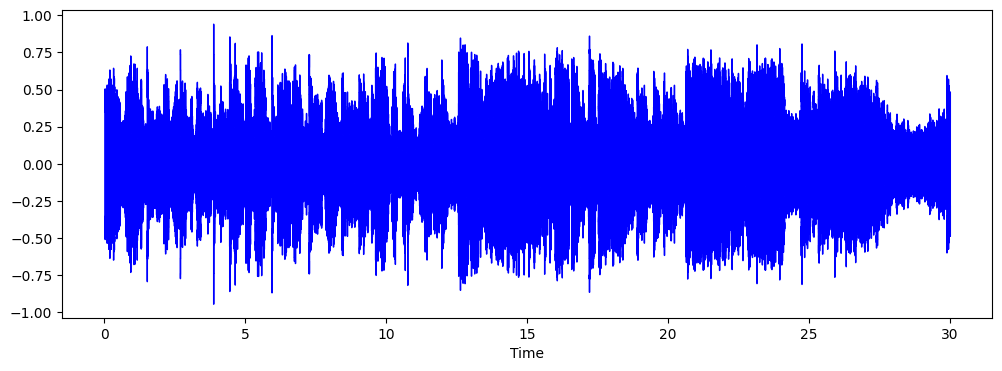

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
librosa.display.waveshow(data_rock, color = "Blue")
plt.show()

wandb.log({"wave_rock": wandb.Image(plt)})

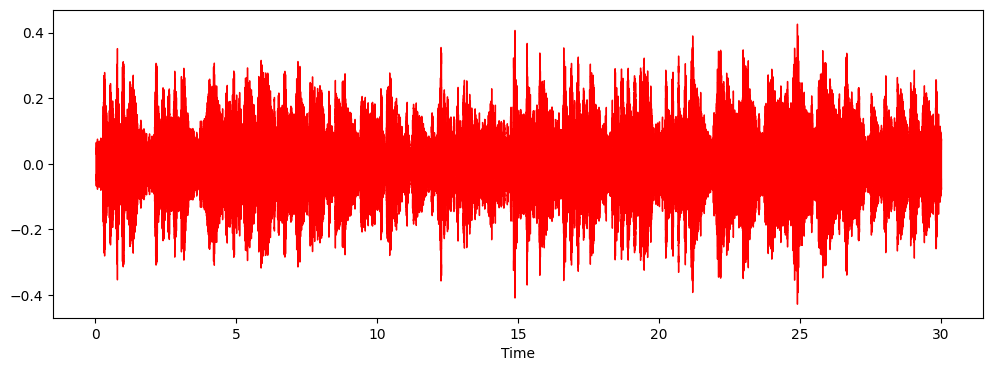

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data_classical, color = "Red")
plt.show()
wandb.log({"wave_classical": wandb.Image(plt)})

## Affichage du STFT (short-time fourier Transform) en décibels

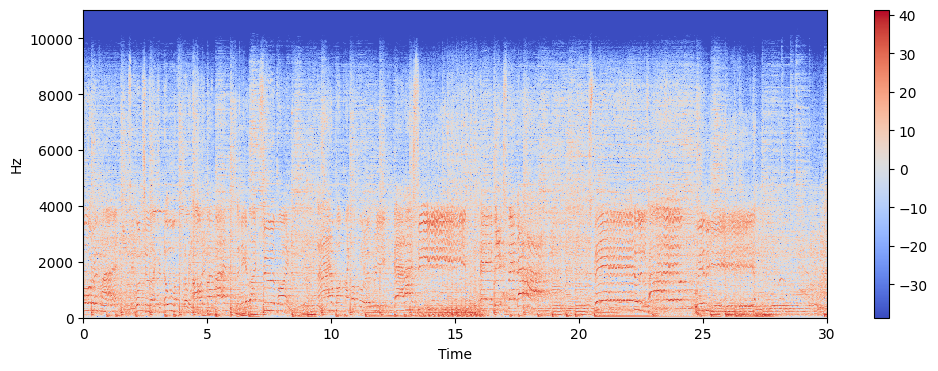

In [ ]:
stft = librosa.stft(data_rock)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr_rock, x_axis='time', y_axis='hz')
plt.colorbar()
wandb.log({"stft_rock": wandb.Image(plt)})

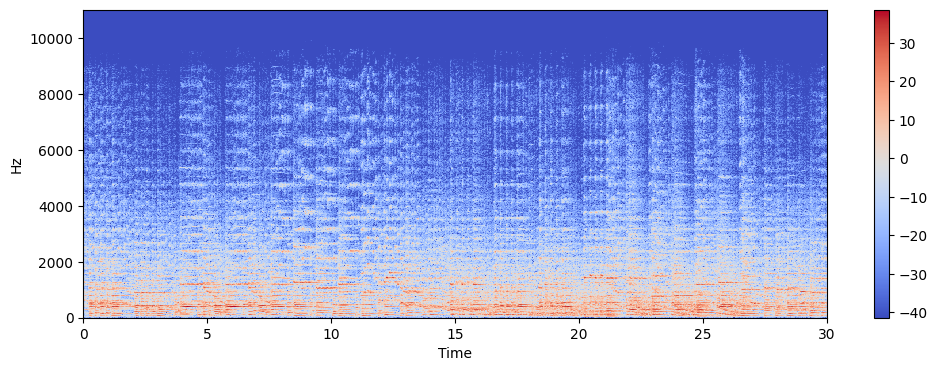

In [ ]:
stft = librosa.stft(data_classical)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr_classical, x_axis='time', y_axis='hz')
plt.colorbar()
wandb.log({"stft_classical": wandb.Image(plt)})

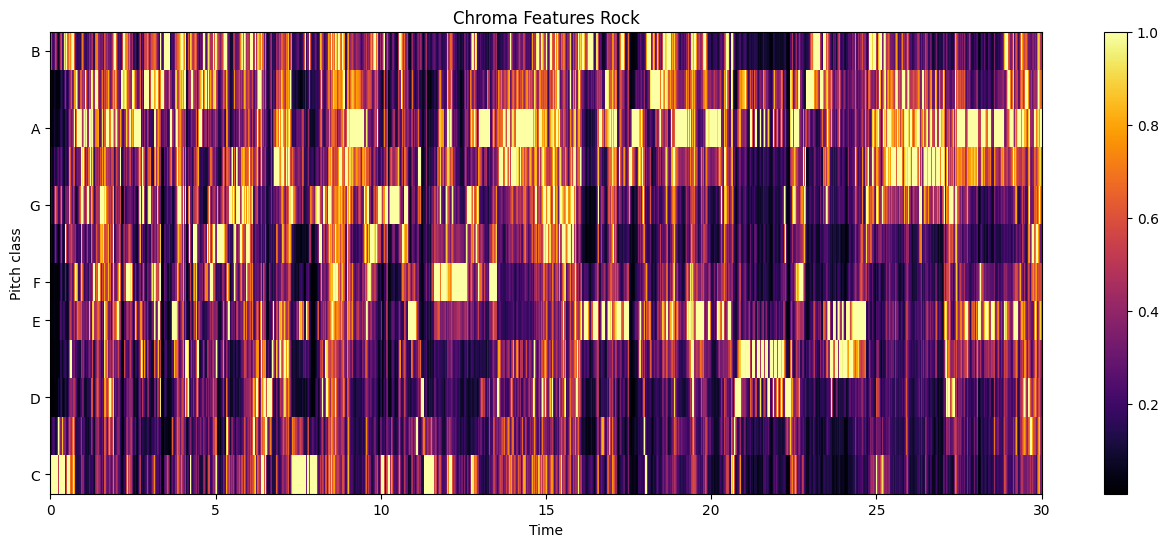

<Figure size 640x480 with 0 Axes>

In [ ]:
chroma = librosa.feature.chroma_stft(y=data_rock, sr=sr_rock)

plt.figure(figsize=(16,6))
librosa.display.specshow(chroma, sr=sr_rock, x_axis='time', y_axis='chroma', cmap='inferno')
plt.colorbar()
plt.title("Chroma Features Rock")
plt.show()
wandb.log({"chroma_rock": wandb.Image(plt)})

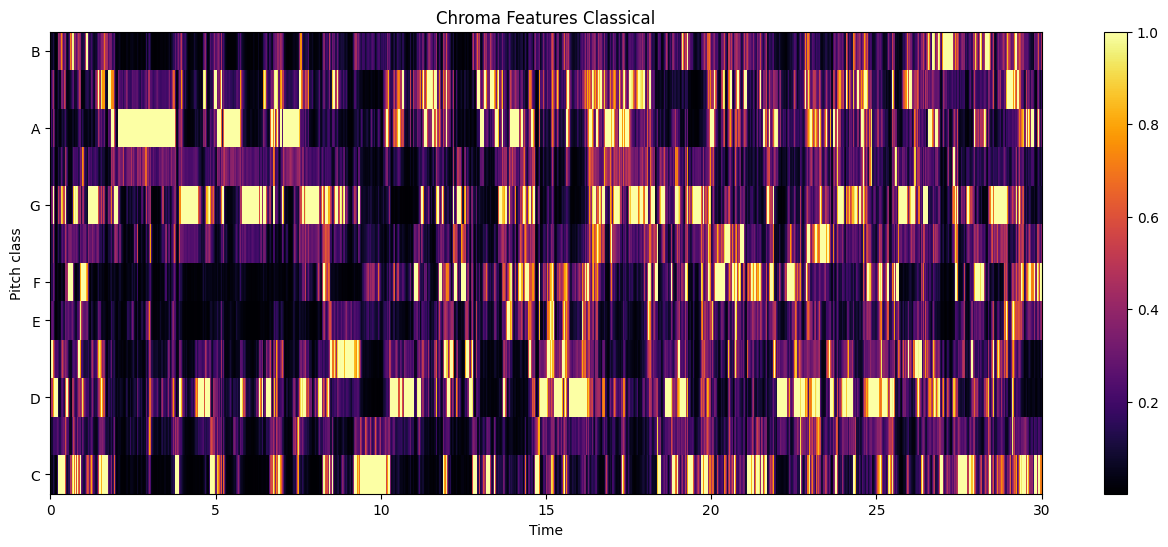

<Figure size 640x480 with 0 Axes>

In [ ]:
chroma = librosa.feature.chroma_stft(y=data_classical, sr=sr_classical)

plt.figure(figsize=(16,6))
librosa.display.specshow(chroma, sr=sr_classical, x_axis='time', y_axis='chroma', cmap='inferno')
plt.colorbar()
plt.title("Chroma Features Classical")
plt.show()
wandb.log({"chroma_classical": wandb.Image(plt)})

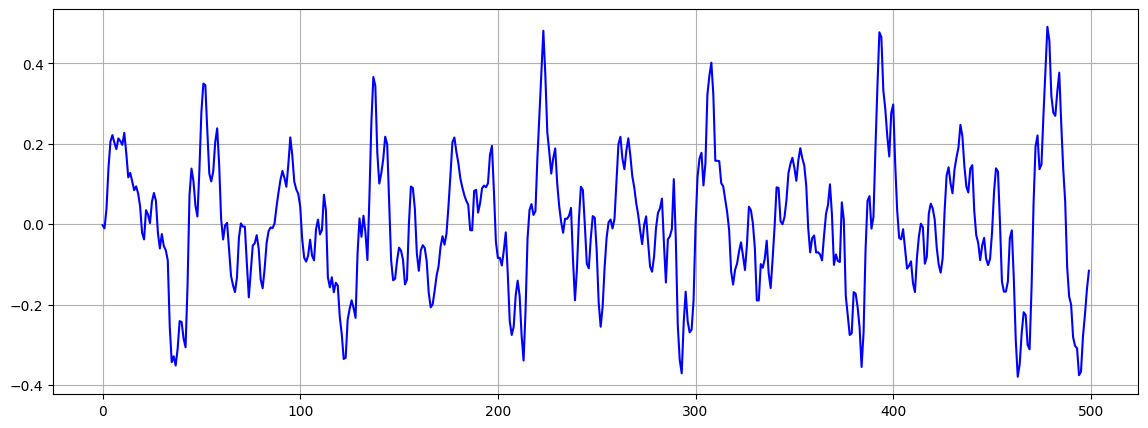

In [ ]:
start = 500
end = 1000
plt.figure(figsize=(14,5))
plt.plot(data_rock[start:end], color='blue')
plt.grid()
wandb.log({"plot_rock": wandb.Image(plt)})

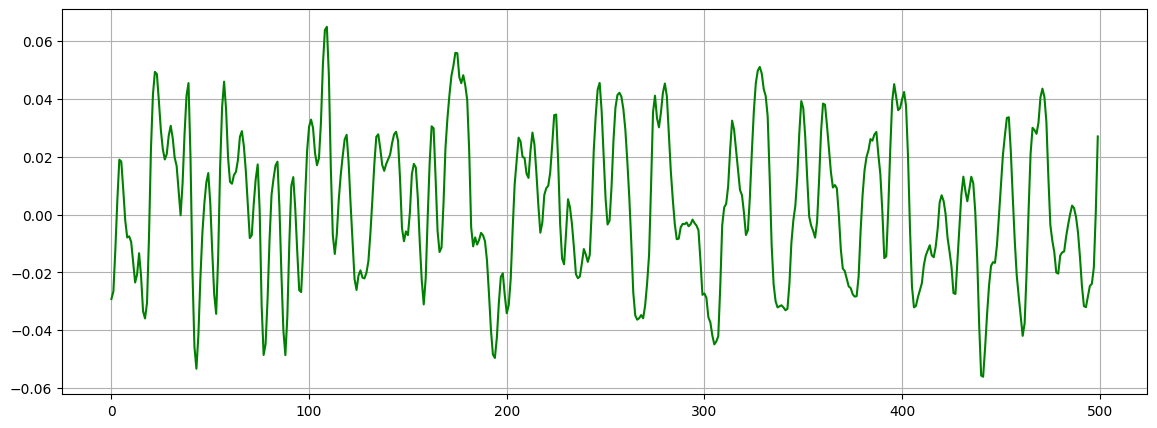

In [ ]:
start = 500
end = 1000
plt.figure(figsize=(14,5))
plt.plot(data_classical[start:end], color='green')
plt.grid()
wandb.log({"plot_classical": wandb.Image(plt)})

In [ ]:
zero_cross_rate = librosa.zero_crossings(data_rock[start:end], pad=False)
print("The number of zero crossings is:",sum(zero_cross_rate))

The number of zero crossings is: 70


In [ ]:
zero_cross_rate = librosa.zero_crossings(data_classical[start:end], pad=False)
print("The number of zero crossings is:",sum(zero_cross_rate))

The number of zero crossings is: 63


## PCA

In [ ]:
from sklearn import preprocessing

data = df_30seconds.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

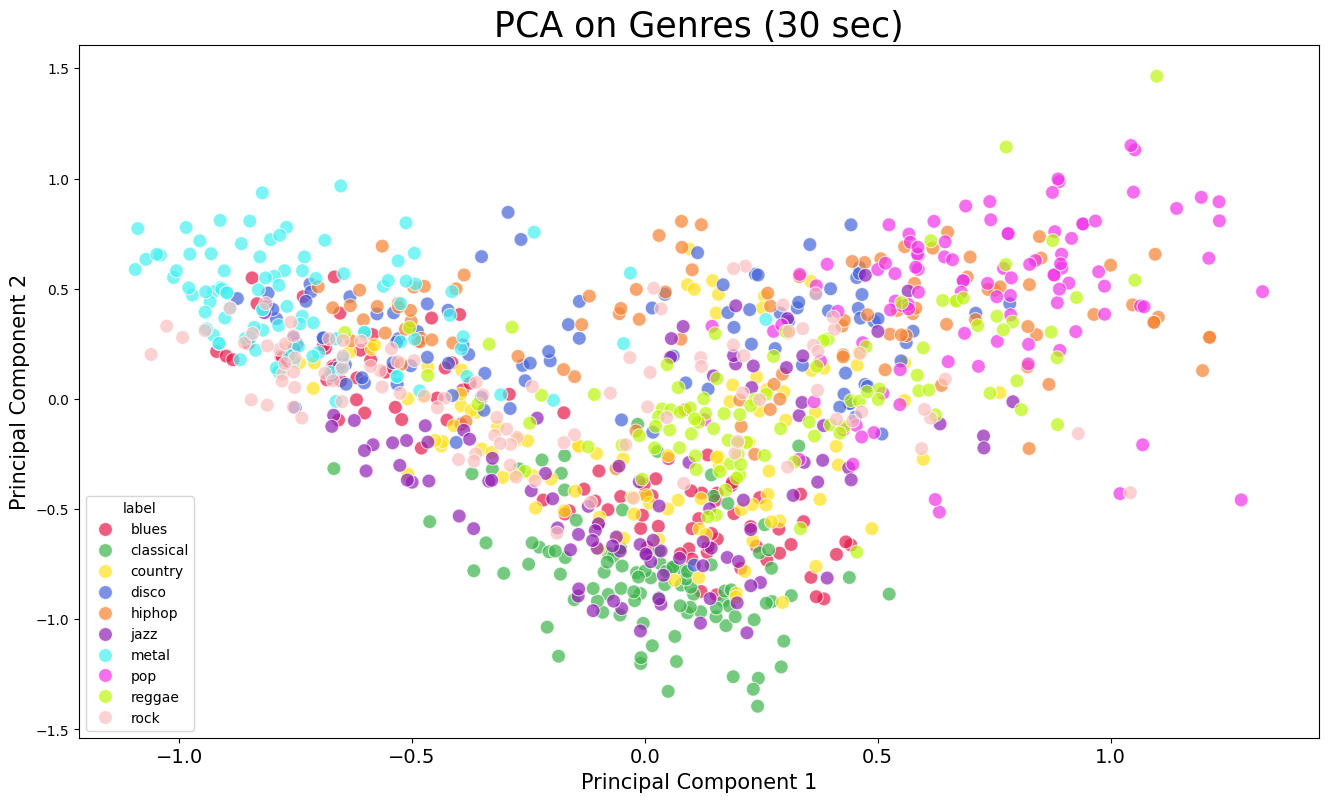

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6",
                  "#bcf60c", "#fabebe"]  # 10 bright distinct colors

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, palette=custom_palette,
               s = 100);

plt.title('PCA on Genres (30 sec)', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")
wandb.log({"PCA_30sec": wandb.Image(plt)})

In [ ]:
#SAME FOR 3 seconds splits
data = df_3seconds.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

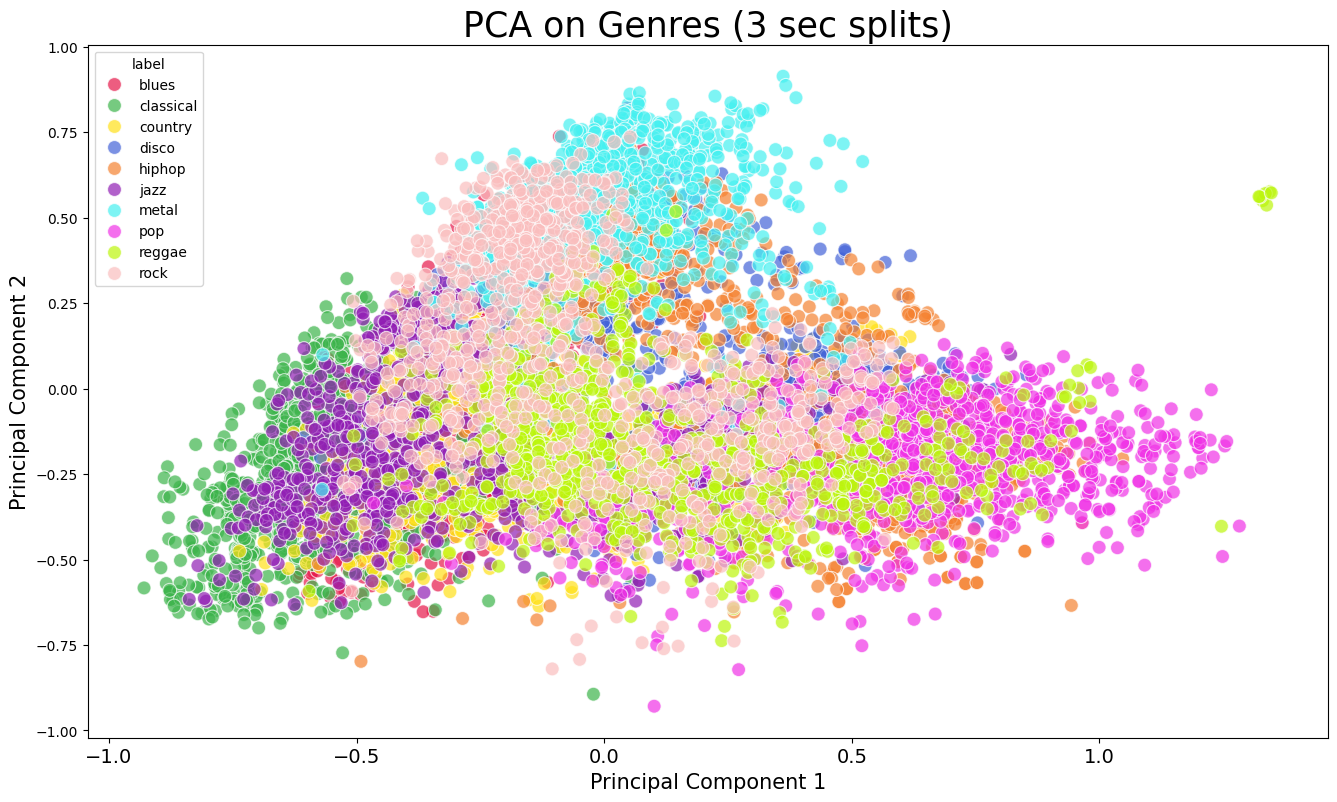

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6",
                  "#bcf60c", "#fabebe"]  # 10 bright distinct colors

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, palette=custom_palette,
               s = 100);

plt.title('PCA on Genres (3 sec splits)', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")
wandb.log({"PCA_3sec": wandb.Image(plt)})

# Models

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_3seconds["music_id"] = df_3seconds["filename"].apply(lambda x: ".".join(x.split(".")[:2]))

unique_music = df_3seconds[["music_id", "label"]].drop_duplicates()

train_music_ids, test_music_ids = train_test_split(
    unique_music,
    test_size=0.2,
    random_state=42,
    stratify=unique_music["label"]
)

train_df = df_3seconds[df_3seconds["music_id"].isin(train_music_ids["music_id"])]
test_df = df_3seconds[df_3seconds["music_id"].isin(test_music_ids["music_id"])]

X_train = train_df.drop(["label", "filename", "music_id"], axis=1)
X_test = test_df.drop(["label", "filename", "music_id"], axis=1)
y_train = train_df["label"]
y_test = test_df["label"]

labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(X_train, dtype=float))
X_test = scaler.transform(np.array(X_test, dtype=float))

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (7990, 58)
Testing set shape: (2000, 58)


## Logistic Regression

Accuracy: 0.6695

Classification Report:
              precision    recall  f1-score   support

       blues       0.62      0.64      0.63       200
   classical       0.89      0.92      0.91       200
     country       0.62      0.61      0.62       200
       disco       0.67      0.50      0.57       200
      hiphop       0.60      0.58      0.59       200
        jazz       0.70      0.83      0.76       200
       metal       0.82      0.77      0.79       200
         pop       0.70      0.72      0.71       200
      reggae       0.57      0.67      0.62       200
        rock       0.50      0.45      0.47       200

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



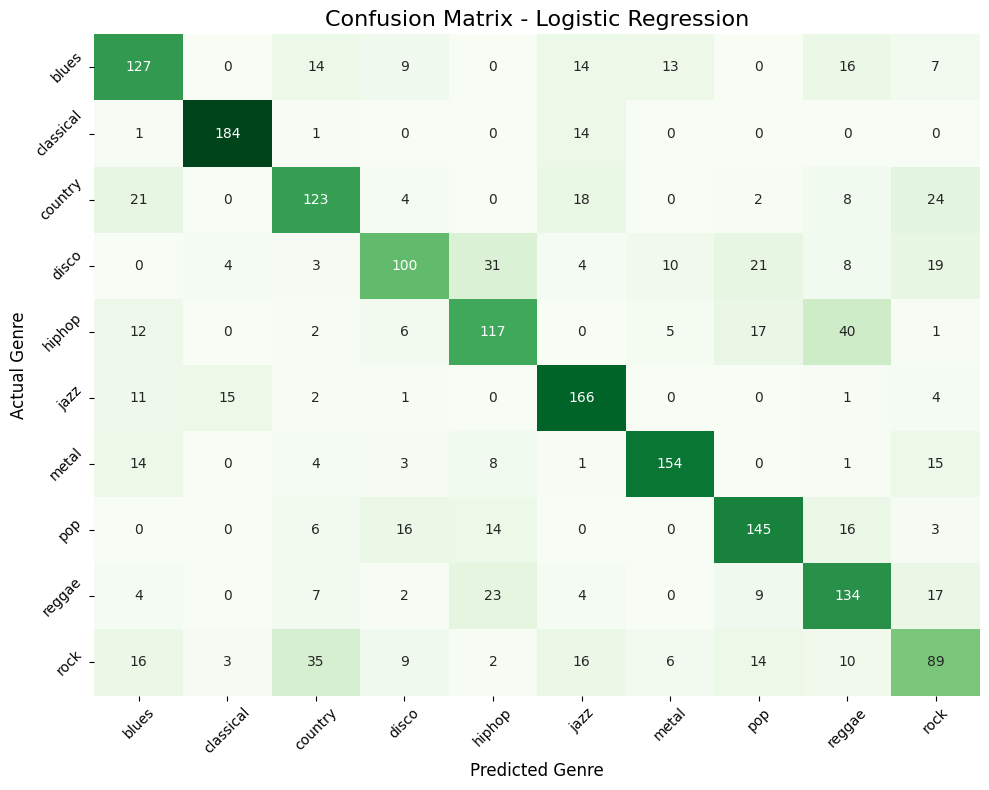

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define class labels
class_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
               'jazz', 'metal', 'pop', 'reggae', 'rock']

# Initialize Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('Actual Genre', fontsize=12)
plt.xlabel('Predicted Genre', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7095

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       200
           1       0.90      0.95      0.92       200
           2       0.67      0.70      0.68       200
           3       0.64      0.55      0.59       200
           4       0.59      0.71      0.65       200
           5       0.72      0.84      0.78       200
           6       0.84      0.83      0.84       200
           7       0.75      0.72      0.74       200
           8       0.61      0.59      0.60       200
           9       0.65      0.52      0.58       200

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000


Confusion Matrix:
[[135   0  18  12   0   7   6   0  19   3]
 [  0 190   1   0   0   8   0   0   1   0]
 [ 23   0 141   0   0  21   0   1   3  11]
 [  0   3  15 110  33   4   6  15  10   4]
 [  6   0

## XGBoost

Accuracy: 0.7095

Classification Report:
              precision    recall  f1-score   support

       blues       0.71      0.68      0.69       200
   classical       0.90      0.95      0.92       200
     country       0.67      0.70      0.68       200
       disco       0.64      0.55      0.59       200
      hiphop       0.59      0.71      0.65       200
        jazz       0.72      0.84      0.78       200
       metal       0.84      0.83      0.84       200
         pop       0.75      0.72      0.74       200
      reggae       0.61      0.59      0.60       200
        rock       0.65      0.52      0.58       200

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



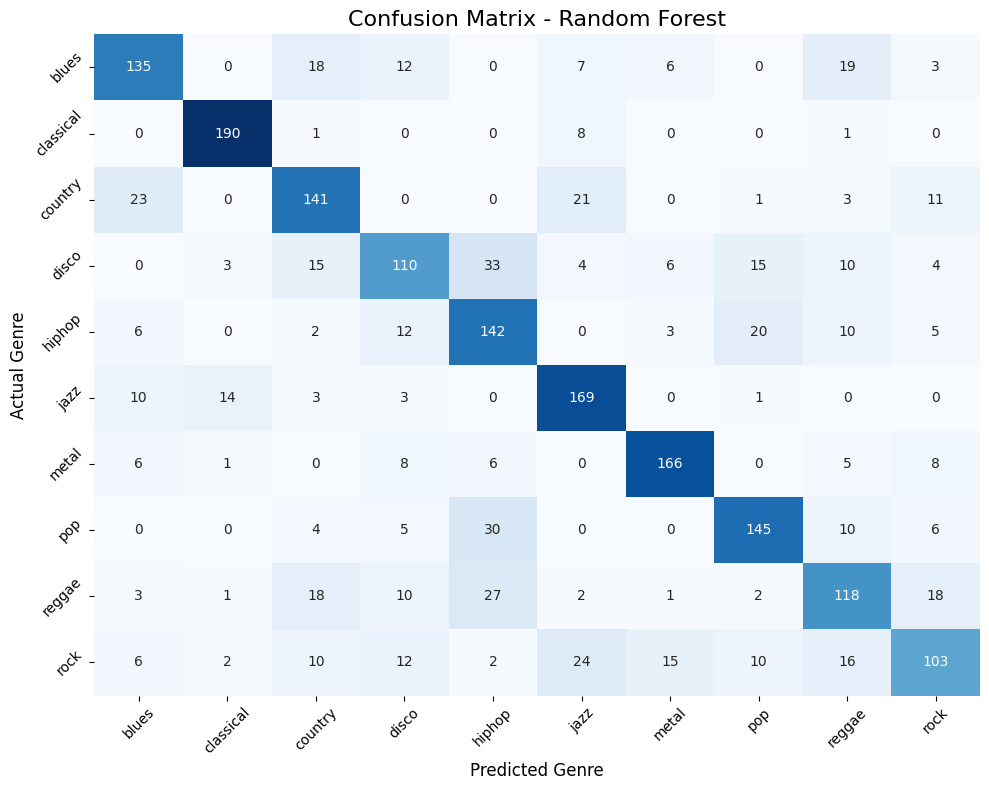

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define class labels
class_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
               'jazz', 'metal', 'pop', 'reggae', 'rock']

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.ylabel('Actual Genre', fontsize=12)
plt.xlabel('Predicted Genre', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

wandb.log({"Confusion Matrix": wandb.Image(plt)})


## CNN

In [ ]:
#trainModel method
#The loss is calculated using sparse_categorical_crossentropy function
from tensorflow import keras
# from wandb.keras import WandbMetricsLogger

def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                     batch_size=batch_size, callbacks=[ reduce_lr, wandb.keras.WandbMetricsLogger(log_freq="epoch")])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)

In [ ]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


import tensorflow as tf
from tensorflow.keras import layers, regularizers

model = keras.models.Sequential([
    layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(10, activation="softmax"),
])
print(model.summary())
model_history = trainModel(model=model, epochs=150, optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,906 (222.29 KB)

 Trainable params: 56,906 (222.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.2630 - loss: 2.3962 - val_accuracy: 0.5240 - val_loss: 1.6725 - learning_rate: 0.0010
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5119 - loss: 1.6964 - val_accuracy: 0.6085 - val_loss: 1.4434 - learning_rate: 0.0010
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5972 - loss: 1.4595 - val_accuracy: 0.6590 - val_loss: 1.3375 - learning_rate: 0.0010
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6351 - loss: 1.3485 - val_accuracy: 0.6725 - val_loss: 1.2695 - learning_rate: 0.0010
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6789 - loss: 1.2105 - val_accuracy: 0.6850 - val_loss: 1.2398 - learning_rate: 0.0010
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7012 - loss: 1.1431 - val_accuracy: 0.6875 - val_loss: 1.2356 - learning_rate: 0.0010
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7161 - loss: 1.0752 - v

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.9676 
The test loss is : 1.133642315864563

The test Accuracy is : 74.90000128746033


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


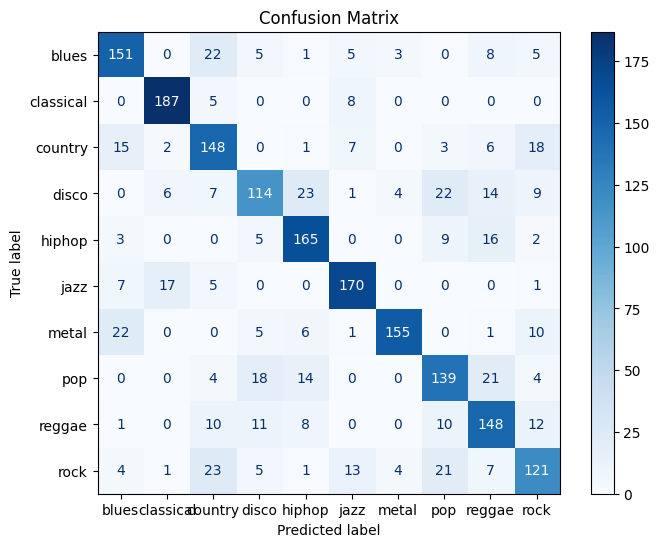

In [ ]:


class_names = labelencoder.classes_
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")

wandb.log({"Confusion Matrix": wandb.Image(fig)})

# Afficher la figure localement
plt.show()


## SVM

Accuracy: 0.7130

Classification Report:
              precision    recall  f1-score   support

       blues       0.75      0.70      0.73       200
   classical       0.88      0.92      0.90       200
     country       0.60      0.72      0.66       200
       disco       0.62      0.58      0.60       200
      hiphop       0.68      0.72      0.70       200
        jazz       0.78      0.82      0.80       200
       metal       0.85      0.77      0.81       200
         pop       0.68      0.60      0.64       200
      reggae       0.60      0.65      0.62       200
        rock       0.72      0.64      0.68       200

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000



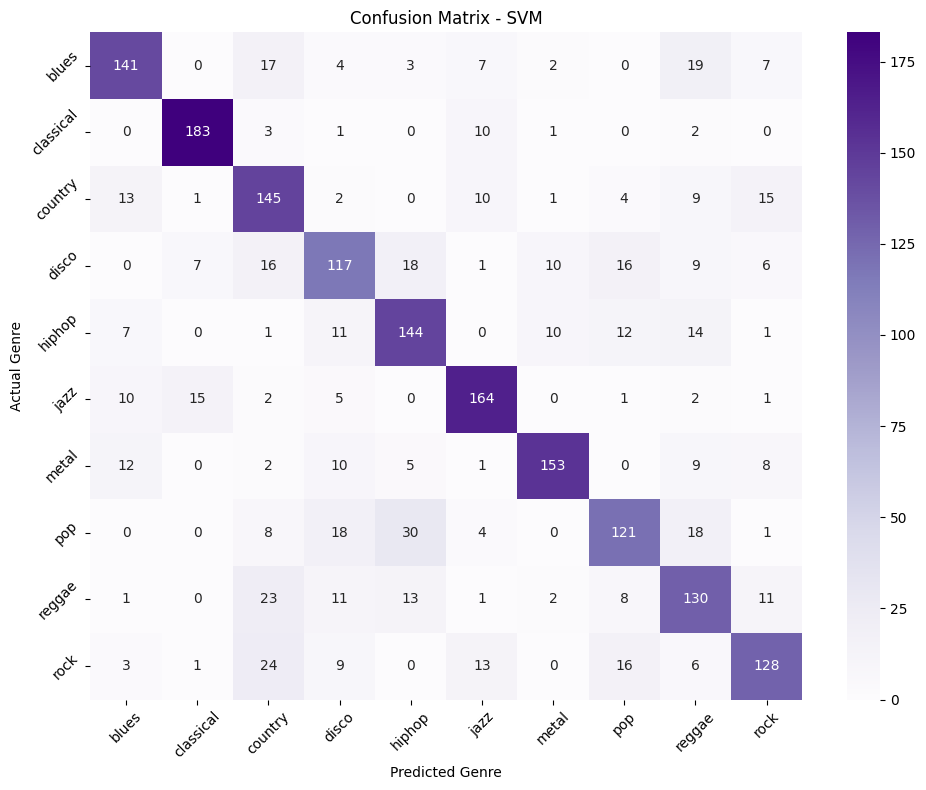

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
               'jazz', 'metal', 'pop', 'reggae', 'rock']
svm_model = SVC(kernel='poly', C=10, gamma='scale')  # 'linear' ou 'poly'

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

wandb.log({"Confusion Matrix": wandb.Image(plt)})
# save accuracy
wandb.log({"accuracy": accuracy})
